# Applied Machine Learning
## Rishikesh Kakde (rkakde)

The dataset I am using was hosted on Kaggle - https://www.kaggle.com/datasets/zalando-research/fashionmnist

### Fashion MNIST
Popular database.
### Description:
Fashion-MNIST is a dataset of Zalando's article images—consisting of a data set of 60,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

### Goal
The goal is to predict the class of each image into the following categories:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [ ]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
df = pd.read_csv("fashion-mnist.csv")

In [ ]:
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


## 1. Statistical descriptions and Visualizations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
df.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

There are no missing values. Let's study the distributions of the data and check if we need to perform any transformations on the features.

In [ ]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [ ]:
df["label"].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

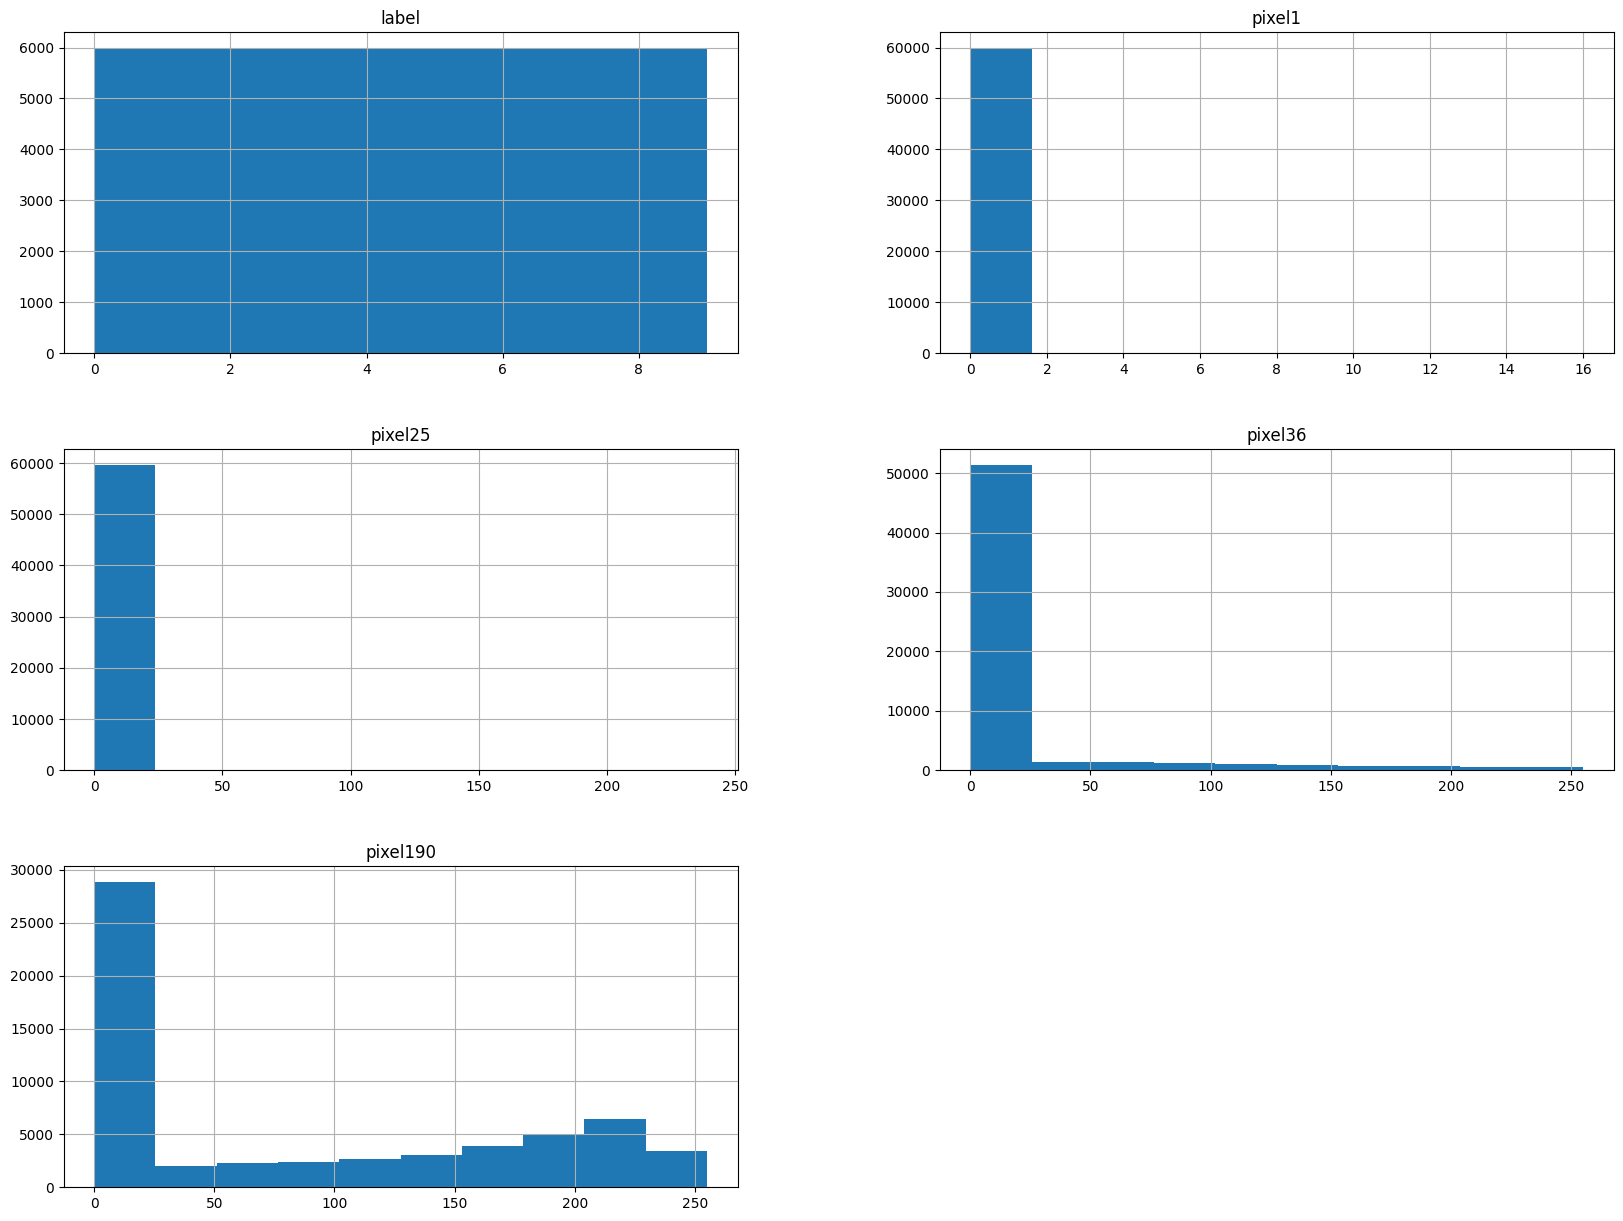

In [ ]:
# Visualization - Histogram
# Getting random columns because there are 785 total columns in the dataset
# 4 random columns along with the label
df_subset = df[["label", "pixel1", "pixel25", "pixel36", "pixel190"]]

df_subset.hist(figsize=(20, 15))
plt.show()

The label is very well balanced. we have 6000 images of each of the 10 labels.


This type of visualization (histograms) is not very helpful because it's an image dataset, let's try to visualize some of the instances as images.

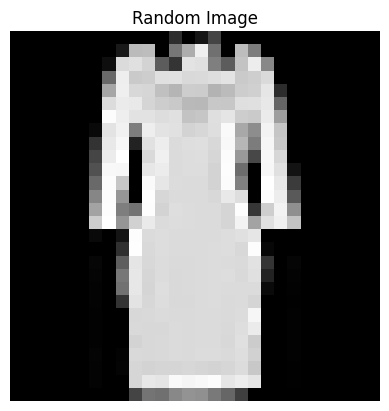

In [ ]:
# Getting an image from the dataset
image = df.drop("label", axis=1).iloc[4]
#Reshape for the plot
image = np.array(image).reshape(28, 28)
# Plot the image
plt.imshow(image, cmap='gray')
plt.title('Random Image')
plt.axis('off')
plt.show()

In [ ]:
df["label"].iloc[4]

3

3 is for dress, which it does look like

Let's check one more image, without the grayscale

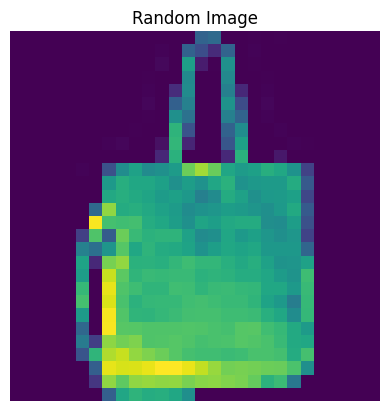

In [ ]:
# Getting an image from the dataset
# No Gray image this time

image = df.drop("label", axis=1).iloc[20000]
#Reshape for the plot
image = np.array(image).reshape(28, 28)
# Plot the image
plt.imshow(image)
plt.title('Random Image')
plt.axis('off')
plt.show()

In [ ]:
df["label"].iloc[20000]

8

8 is for bags and it looks quite like a bag even without the colors.

### Special Treatment on features
Since, this is a well curated dataset we don't need to perform any transformations on the features. But machine leanring algorithm, particularly Support Vector Machine, perform well with scaled features. So we will use scale the fetures using Standard Scaler in Scikit-Learn. The sclaer will be fit on the training data after we split the dataset into training, validation, and testing sets.

## 2. Correlation and Scatter plots

In [ ]:
df.corr()